In [1]:
import numpy as np
import matplotlib.pylab as pl

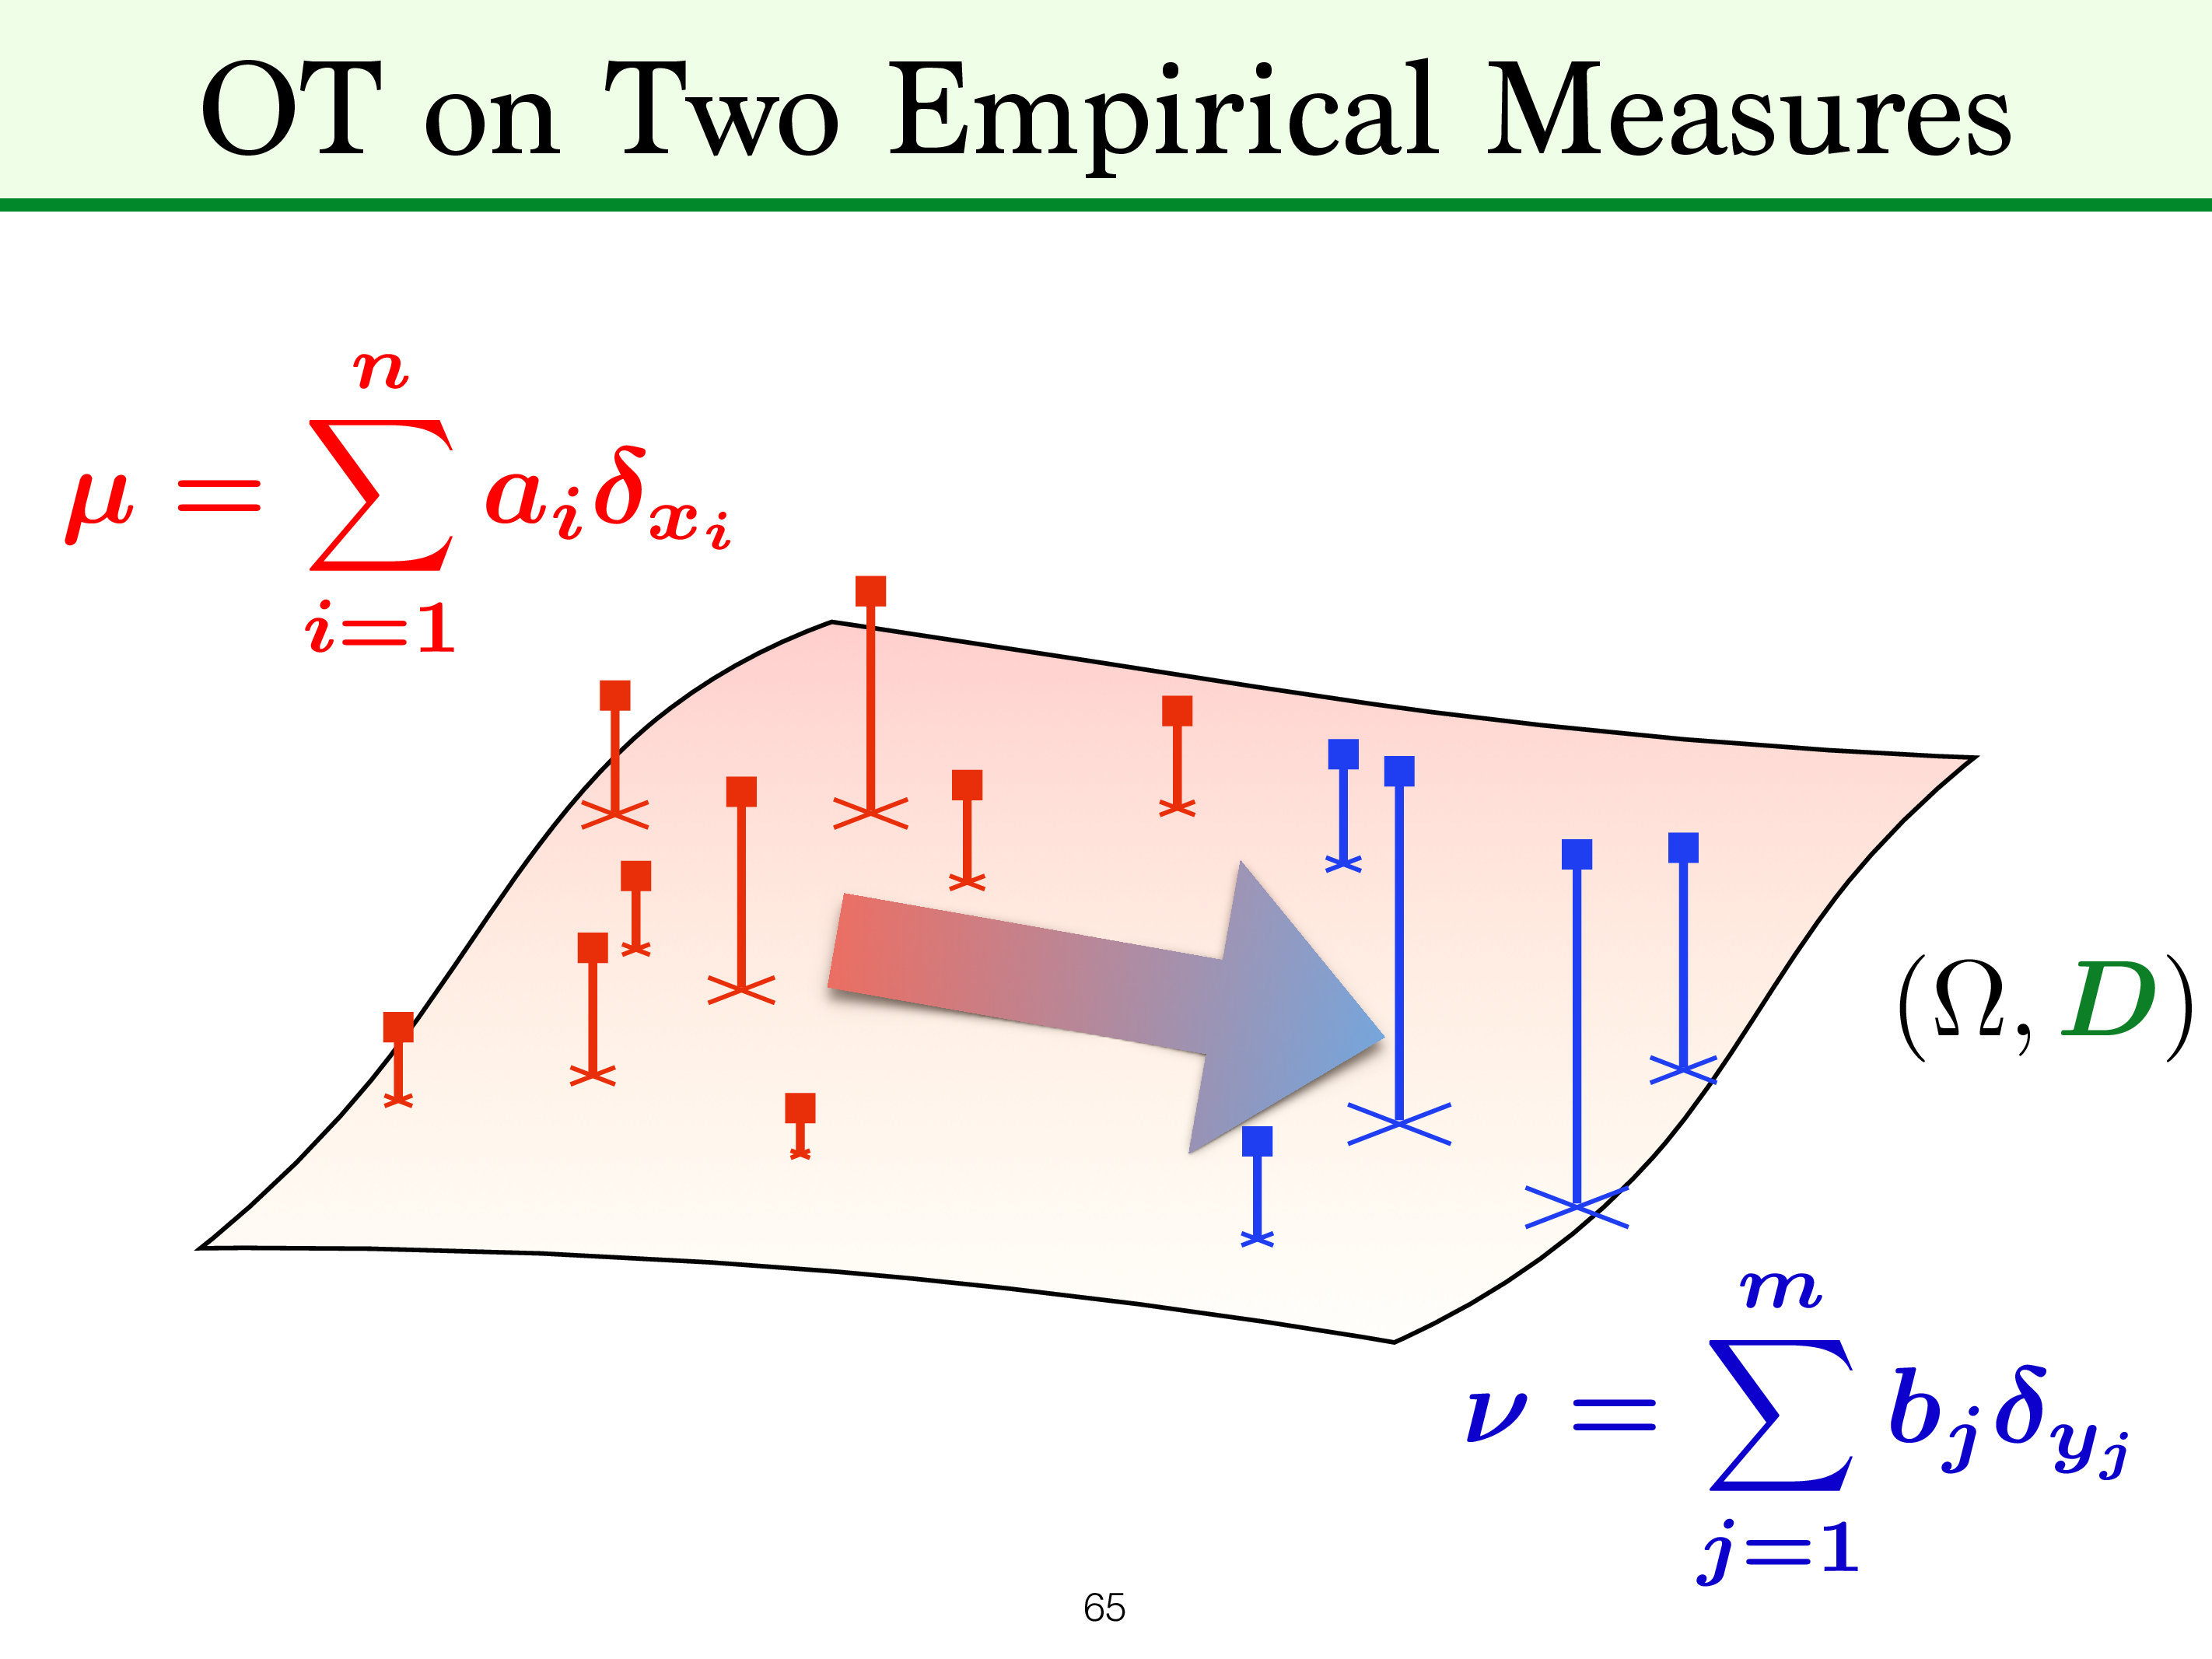

In [2]:
# Empirical measures
d = 2
n = 5  # \mu is the sum of 10 Diracs
m = 10  # \nu is the sum of 20 Diracs

# \mu = \sum a_i * \delta_{x_i}
mu_x = np.array([0., 0.])
cov_x = np.array([[1., 0.], [0., 1.]])
x = np.stack([np.random.multivariate_normal(mu_x, cov_x) for _ in range(n)])  # (n, d)
a = np.ones(n) / n  # (n,)

# \nu = \sum b_j * \delta_{y_j}
mu_y = np.array([4., 4.])
cov_y = np.array([[1., 0.], [0., 1.]])
y = np.stack([np.random.multivariate_normal(mu_y, cov_y) for _ in range(m)])  # (m, d)
b = np.ones(m) / m  # (m,)

Text(0.5, 1.0, 'Source and target distributions.')

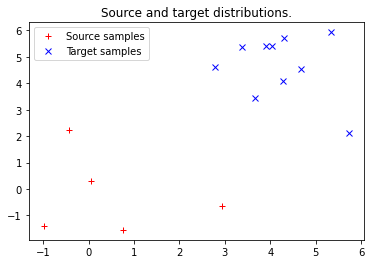

In [3]:
pl.figure()
pl.plot(x[:, 0], x[:, 1], '+r', label='Source samples')  # '+' colored by red
pl.plot(y[:, 0], y[:, 1], 'xb', label='Target samples')  # 'x' colored by blue
pl.legend(loc=0)
pl.title('Source and target distributions.')

In [4]:
# Transportation costs
from scipy.spatial.distance import cdist
M_xy = cdist(x, y)  # (n, m), D = Euclidean distance

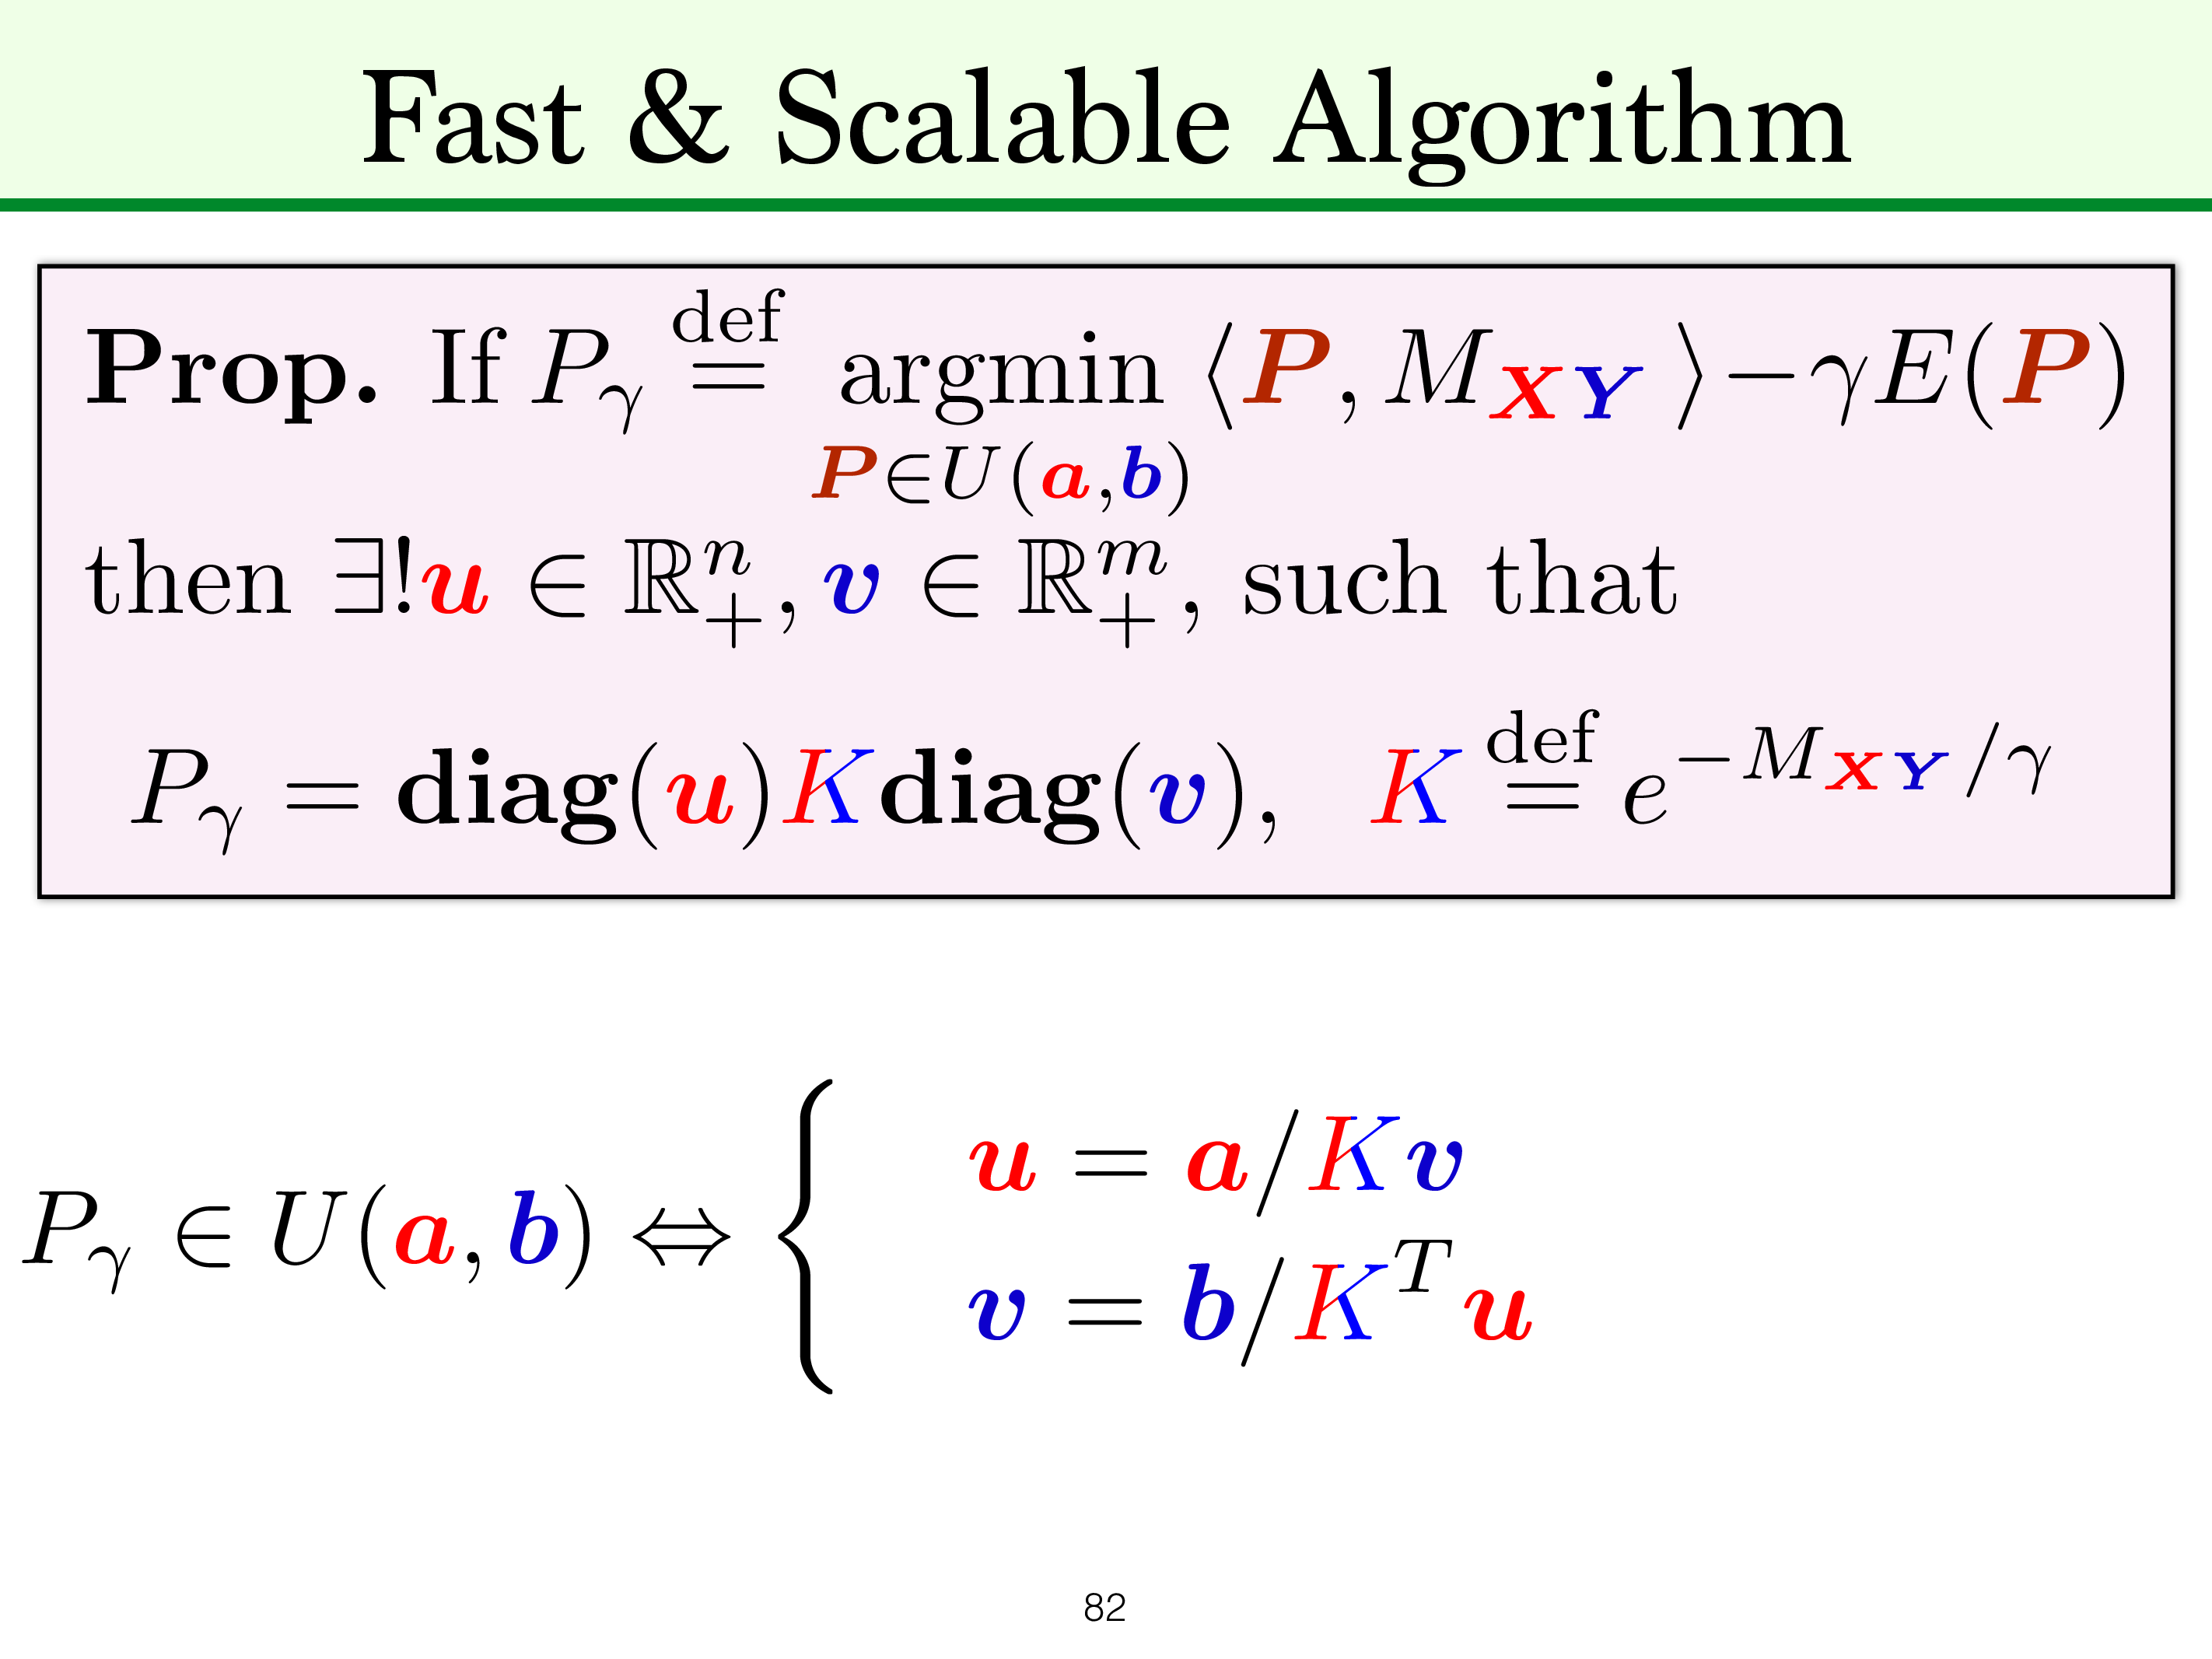

In [5]:
# The Sinkhorn's algorithm
gamma = 0.1  # a hyper parameter

K = np.exp(-M_xy / gamma)  # (n, m), given by the problem
u = np.random.random(n)    # (n,), to be optimized
v = np.random.random(m)    # (m,), to be optimized

for _ in range(10):
    u = a / np.matmul(K, v)    # (n,), a / (K x v)
    v = b / np.matmul(K.T, u)  # (m,), b / (K^T x u)

P_gamma = np.matmul(np.matmul(np.diag(u), K), np.diag(v))  # (n, m), diag(u) x K x diag(v)
W = np.sum(P_gamma * M_xy)

In [6]:
print(f'Wasserstein distance: {W:.2f}')

Wasserstein distance: 6.24


Text(0.5, 1.0, 'OT matrix with samples')

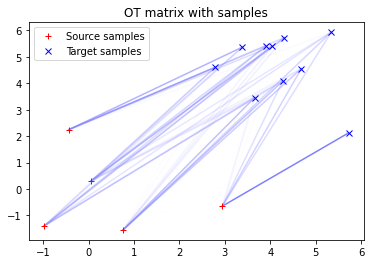

In [7]:
# Show OT
from ot.plot import plot2D_samples_mat
pl.figure()
plot2D_samples_mat(x, y, P_gamma, c=[.5, .5, 1.])
pl.plot(x[:, 0], x[:, 1], '+r', label='Source samples')
pl.plot(y[:, 0], y[:, 1], 'xb', label='Target samples')
pl.legend(loc=0)
pl.title('OT matrix with samples')

In [8]:
# Calculate P_gamma & W using POT (https://pythonot.github.io/)
import ot

P_gamma_ = ot.sinkhorn(a, b, M_xy, gamma)
W_ = ot.sinkhorn2(a, b, M_xy, gamma)

print(f'Wasserstein distance (calculated by POT): {W:.2f}')

Wasserstein distance (calculated by POT): 6.24


Text(0.5, 1.0, 'OT matrix with samples')

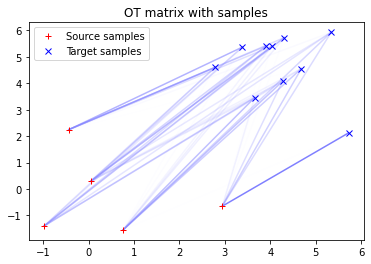

In [9]:
pl.figure()
plot2D_samples_mat(x, y, P_gamma_, c=[.5, .5, 1.])
pl.plot(x[:, 0], x[:, 1], '+r', label='Source samples')
pl.plot(y[:, 0], y[:, 1], 'xb', label='Target samples')
pl.legend(loc=0)
pl.title('OT matrix with samples')